In [1]:
import pandas as pd

In [2]:
school_df = pd.read_excel("2019 School Program Survey Results.xlsx",sheet_name='All Data')

In [3]:
comments = school_df['Comments and suggestions']

In [4]:
comments = comments.dropna()

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

In [6]:
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

In [8]:
sid = SentimentIntensityAnalyzer()

In [9]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# sentiment analysis doesn't seem to work great for this data set

In [11]:
for val in comments:
    print (sid.polarity_scores(val), val)

{'neg': 0.0, 'neu': 0.277, 'pos': 0.723, 'compound': 0.9198} Great workshop - very organized. Clean and neat space. :)
{'neg': 0.0, 'neu': 0.277, 'pos': 0.723, 'compound': 0.9198} Great workshop - very organized. Clean and neat space. :)
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} The workshop aligned to our learning goals.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} The workshop aligned to our learning goals.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} Aligned with course objective
{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.5994} I loved the station teaching, hands-on materials, and live animals
{'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'compound': 0.9581} This was a wonderful exploration. The children were fully engaged. The experiences were very much hands-on and the children enjoyed it very much! Thank you and your wonderful staff for having us!
{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.8622} Great program - loved the design cha

In [12]:
from nltk.corpus import stopwords

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stopwords = set(stopwords.words('english'))

In [15]:
string = ' '.join(list(comments))

import re

string = re.sub('[^0-9a-zA-Z]+', ' ', string).lower()

str_list = string.split(' ')

In [16]:
imp_str_li = [x for x in str_list if x not in stopwords]

In [18]:
sid.polarity_scores('goals')['neg']

0.0

In [19]:
neutral_words = []
for val in imp_str_li:
    if sid.polarity_scores(val)['neu'] > 0:
        neutral_words.append(val)
        print (sid.polarity_scores(val), val)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} workshop
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} organized
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} space
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} workshop
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} organized
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} space
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} workshop
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} aligned
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} learning
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} goals
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} workshop
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} aligned
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} learning
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} goals
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} aligned
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} course
{'neg':

In [20]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

In [21]:
ps = PorterStemmer() 

In [22]:
stem = []
for word in imp_str_li:
    stem.append(ps.stem(word))
    if word != ps.stem(word):
        print(word, ps.stem(word))

organized organ
organized organ
aligned align
learning learn
goals goal
aligned align
learning learn
goals goal
aligned align
course cours
objective object
loved love
teaching teach
hands hand
materials materi
animals anim
wonderful wonder
exploration explor
fully fulli
engaged engag
experiences experi
hands hand
enjoyed enjoy
wonderful wonder
loved love
challenge challeng
amazing amaz
efficient effici
hands hand
activities activ
learning learn
nature natur
inquiry inquiri
activity activ
everything everyth
aligned align
permits permit
kids kid
questions question
variety varieti
ages age
activities activ
seemed seem
effectively effect
engage engag
range rang
excellent excel
experience experi
really realli
hands hand
portions portion
activity activ
absolutely absolut
wonderful wonder
activities activ
naturally natur
engaging engag
however howev
educator educ
lacked lack
delivering deliv
students student
engaged engag
students student
educator educ
lively live
engaging engag
students stud

In [23]:
counter = {}

for word in imp_str_li:
    if word in counter:
        counter[word] +=1
    else:
        counter[word] = 1

In [24]:
stem_counter = {}
for word in stem:
    if word in stem_counter:
        stem_counter[word] +=1
    else:
        stem_counter[word] = 1

In [25]:
for key, value in sorted(counter.items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (key, value))

students: 23
great: 19
thank: 15
program: 14
time: 11
kids: 10
workshop: 9
excellent: 9
hands: 8
wonderful: 8
activities: 8
engaging: 8
engaged: 7
enjoyed: 7
love: 7
trip: 7
learning: 6
materials: 5
children: 5
much: 5
use: 5
next: 5
class: 5
would: 5
well: 5
aligned: 4
us: 4
activity: 4
really: 4
1st: 4
educator: 4
effective: 4
interactive: 4
visit: 4
awesome: 4
material: 4
year: 4
organized: 3
clean: 3
space: 3
loved: 3
amazing: 3
answer: 3
questions: 3
engage: 3
age: 3
way: 3
accommodating: 3
interested: 3
fun: 3
work: 3
attention: 3
school: 3
first: 3
felt: 3
sitting: 3
information: 3
educational: 3
spanish: 3
neat: 2
goals: 2
station: 2
staff: 2
challenge: 2
seemed: 2
effectively: 2
experience: 2
content: 2
science: 2
curriculum: 2
older: 2
could: 2
directions: 2
lots: 2
though: 2
late: 2
used: 2
enjoy: 2
stations: 2
knowledgeable: 2
engagement: 2
learners: 2
appropriate: 2
grade: 2
seem: 2
always: 2
back: 2
visual: 2
pleas: 2
small: 2
group: 2
connect: 2
student: 2
especially: 2


In [26]:
for key, value in sorted(stem_counter.items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (key, value))

student: 25
engag: 20
great: 19
thank: 16
program: 15
activ: 13
time: 12
kid: 11
love: 10
enjoy: 10
workshop: 9
learn: 9
materi: 9
excel: 9
hand: 8
wonder: 8
use: 8
educ: 8
trip: 7
effect: 6
class: 6
interest: 6
align: 5
children: 5
much: 5
next: 5
would: 5
interact: 5
well: 5
station: 4
experi: 4
us: 4
challeng: 4
question: 4
age: 4
seem: 4
realli: 4
1st: 4
visit: 4
awesom: 4
year: 4
inform: 4
organ: 3
clean: 3
space: 3
amaz: 3
answer: 3
way: 3
accommod: 3
learner: 3
fun: 3
work: 3
attent: 3
school: 3
first: 3
speak: 3
oyster: 3
lesson: 3
felt: 3
sit: 3
come: 3
spanish: 3
neat: 2
goal: 2
live: 2
staff: 2
natur: 2
content: 2
mind: 2
nice: 2
scienc: 2
curriculum: 2
older: 2
could: 2
direct: 2
lot: 2
though: 2
late: 2
instructor: 2
knowledg: 2
appropri: 2
grade: 2
rock: 2
alway: 2
back: 2
visual: 2
plea: 2
small: 2
group: 2
understand: 2
connect: 2
especi: 2
web: 2
prioriti: 2
like: 2
tone: 2
hope: 2
made: 2
everi: 2
done: 2
conserv: 2
give: 2
opportun: 2
booklet: 2
help: 2
christina: 2


In [27]:
from wordcloud import WordCloud

In [28]:
neutral_words

['workshop',
 'organized',
 'space',
 'workshop',
 'organized',
 'space',
 'workshop',
 'aligned',
 'learning',
 'goals',
 'workshop',
 'aligned',
 'learning',
 'goals',
 'aligned',
 'course',
 'objective',
 'station',
 'teaching',
 'hands',
 'materials',
 'live',
 'animals',
 'children',
 'fully',
 'experiences',
 'much',
 'hands',
 'children',
 'much',
 'staff',
 'us',
 'program',
 'design',
 'time',
 'use',
 'time',
 'hands',
 'activities',
 'cohort',
 'learning',
 'nature',
 'home',
 'inquiry',
 'station',
 '3d',
 'map',
 'activity',
 'everything',
 'much',
 'aligned',
 'taught',
 'next',
 'time',
 'time',
 'permits',
 'answer',
 'kids',
 'questions',
 'variety',
 'ages',
 'activities',
 'seemed',
 'age',
 'range',
 'experience',
 'child',
 'really',
 'hands',
 'portions',
 'activity',
 'program',
 'absolutely',
 'activities',
 'naturally',
 'however',
 '1st',
 'educator',
 'lacked',
 'delivering',
 'content',
 'keep',
 'age',
 'students',
 'mind',
 'way',
 'students',
 'next',
 'e

In [29]:
neutral_counter = {}
for word in neutral_words:
    if word in neutral_counter:
        neutral_counter[word] +=1
    else:
        neutral_counter[word] = 1

In [30]:
for key, value in sorted(neutral_counter.items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (key, value))

students: 23
program: 14
time: 11
kids: 10
workshop: 9
hands: 8
activities: 8
trip: 7
learning: 6
materials: 5
children: 5
much: 5
use: 5
next: 5
class: 5
would: 5
aligned: 4
us: 4
activity: 4
really: 4
1st: 4
educator: 4
interactive: 4
visit: 4
material: 4
year: 4
organized: 3
space: 3
answer: 3
questions: 3
age: 3
way: 3
accommodating: 3
work: 3
attention: 3
school: 3
first: 3
felt: 3
sitting: 3
information: 3
educational: 3
spanish: 3
goals: 2
station: 2
staff: 2
seemed: 2
experience: 2
content: 2
science: 2
curriculum: 2
older: 2
could: 2
directions: 2
lots: 2
though: 2
late: 2
used: 2
stations: 2
knowledgeable: 2
learners: 2
appropriate: 2
grade: 2
seem: 2
always: 2
back: 2
visual: 2
pleas: 2
small: 2
group: 2
connect: 2
student: 2
especially: 2
web: 2
oysters: 2
priority: 2
tone: 2
made: 2
every: 2
done: 2
lesson: 2
booklet: 2
christina: 2
water: 2
coming: 2
going: 2
try: 2
learn: 2
outside: 2
speak: 2
english: 2
course: 1
objective: 1
teaching: 1
live: 1
animals: 1
fully: 1
expe

In [31]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(' '.join(imp_str_li) )

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

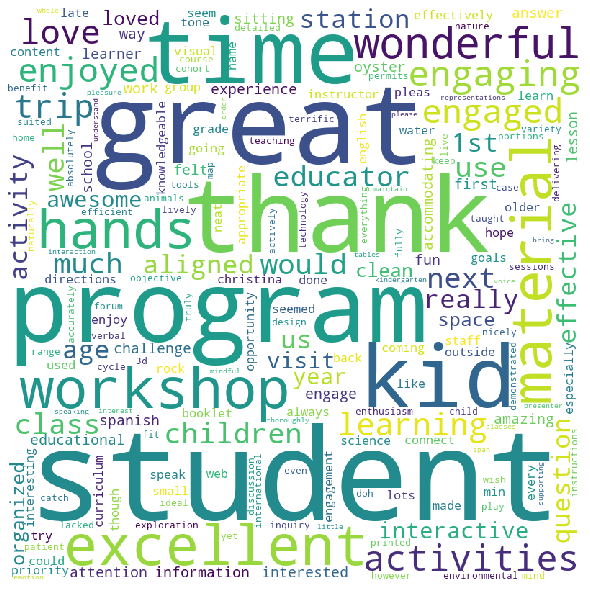

In [33]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

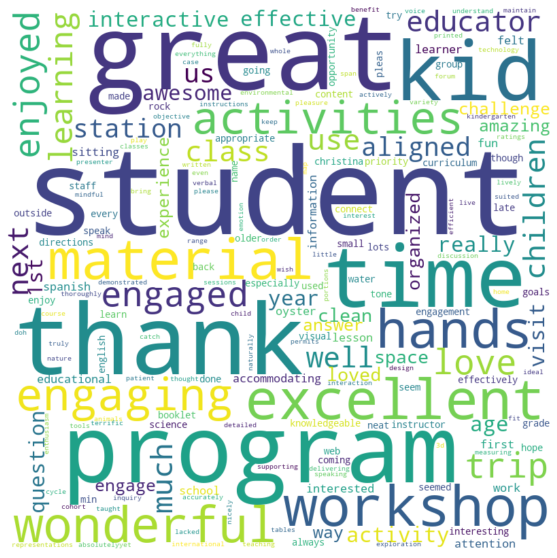

In [34]:
wordcloud = WordCloud(width=800, background_color='white',height=800, margin=0).generate(' '.join(imp_str_li))

plt.figure(figsize = (10, 10), facecolor = None) 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
school_df.head()

,Respondent ID,Collector ID,Start Date,Date,Month,Grade,Program:,Provided opportunities for participants to learn new material.,Addressed NY common core standards through interactive activities.,Provided a learning opportunity not available in the classroom.,...,Paper v online discrepancy,Additional Comments,How effectively did we communicate class content?,How effectively did we communicate learning objectives?,How effectively did we engage all learners?,How effectively did we utilize the time available?,How effectively did we answer questions?,How effectively did we manage the classroom?,What is the likelihood that your organization will participate in Brooklyn Bridge Park Conservancy's education program in the future?,Comments and suggestions
0,10574862041,226886469,2019-03-06 13:14:20,2019-01-03,1,5,"E3: Exploration, Ecology and the Environment",Yes,Yes,Yes,...,NaN,NaN,Highly Effectively,Highly Effectively,Highly Effectively,Highly Effectively,Highly Effectively,Highly Effectively,Very Likely,Great workshop - very organized. Clean and nea...
1,10872717411,226886469,2019-07-20 13:51:58,2019-01-03,1,K,"E3: Exploration, Ecology and the Environment",Yes,Yes,Yes,...,NaN,NaN,Highly Effectively,Highly Effectively,Highly Effectively,Highly Effectively,Highly Effectively,Highly Effectively,Very Likely,Great workshop - very organized. Clean and nea...
2,10574868863,226886469,2019-03-06 13:29:17,2019-01-08,1,8,Sustainable Landscapes,Yes,Yes,Yes,...,NaN,NaN,Highly Effectively,Highly Effectively,Highly Effectively,Highly Effectively,Highly Effectively,Highly Effectively,Very Likely,The workshop aligned to our learning goals.
3,10872718331,226886469,2019-07-20 13:53:15,2019-01-08,1,8,Sustainable Landscapes,Yes,Yes,Yes,...,NaN,NaN,Highly Effectively,Highly Effectively,Highly Effectively,Highly Effectively,Highly Effectively,Highly Effectively,Very Likely,The workshop aligned to our learning goals.
4,10872716336,226886469,2019-07-20 13:50:56,2019-01-09,1,8,Sustainable Landscapes,Yes,Yes,Yes,...,NaN,NaN,Highly Effectively,Highly Effectively,Highly Effectively,Highly Effectively,Highly Effectively,Highly Effectively,Very Likely,Aligned with course objective


In [37]:
class_order  = list(school_df.groupby("Program:").groups.keys())

In [38]:
class_dict = {x:"" for x in class_order}

https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

In [40]:
for i, group in school_df.groupby("Program:"):
    comments = list(group['Comments and suggestions'].dropna())
    string = ' '.join(list(comments))
    string = re.sub('[^0-9a-zA-Z]+', ' ', string).lower()
    string = ' '.join([x for x in string.split(' ') if x not in stopwords])
    
    class_dict[i] = string
    

In [41]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(class_dict.values())

In [42]:
vectors

<9x377 sparse matrix of type '<class 'numpy.float64'>'
	with 569 stored elements in Compressed Sparse Row format>

In [43]:
feature_names = vectorizer.get_feature_names()

In [44]:
dense = vectors.todense()

In [45]:
denselist = dense.tolist()

In [46]:
df = pd.DataFrame(denselist, columns=feature_names)

In [47]:
df

,10,1st,2nd,3d,able,absolutely,academic,accessible,accommodating,accurately,...,wonderful,work,workshop,world,would,written,year,yearly,yet,young
0,0.000000,0.057831,0.000000,0.089129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.103208,0.000000,0.154812,0.089129,0.000000,0.000000,0.000000,0.089129,0.000000,0.089129
1,0.000000,0.000000,0.078683,0.000000,0.000000,0.000000,0.078683,0.000000,0.066457,0.000000,...,0.045556,0.000000,0.045556,0.000000,0.173347,0.000000,0.051054,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.202921,...,0.000000,0.000000,0.117488,0.000000,0.000000,0.000000,0.131667,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.164723,0.000000,0.000000,0.164723,0.000000,0.145542,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.150389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.081784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.212916,0.000000,...,0.072977,0.000000,0.218931,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.049963,0.000000,0.000000,0.077001,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.056547,0.000000,0.000000,0.056547,0.077001,0.000000,0.000000,0.000000,0.000000
7,0.163703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.163703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.091921,0.000000,0.000000,0.000000,0.141666,0.000000,0.000000,0.000000,0.000000,...,0.246067,0.104035,0.082022,0.000000,0.000000,0.000000,0.091921,0.000000,0.141666,0.000000


In [48]:
df['class']=class_order

In [49]:

pd.set_option('display.max_rows',500)

In [50]:
df = df.set_index('class')

In [51]:
mask = df.max() >0.17

In [52]:
masked_dict = dict(zip(df.columns,mask))

In [53]:
fin_mask_dict = {x for x in masked_dict if masked_dict[x] >0}

In [54]:
pd.set_option('display.max_columns',100)

In [55]:
masked_df =df[fin_mask_dict]

In [56]:
masked_df

,program,second,thanks,demonstrated,couple,goals,grade,thank,information,accurately,doh,christina,diff,efforts,come,kids,children,wonderful,play,challenge,engaged,would,rock,ton,great,accommodating,much,inspiring,programs,group,students,stations,neat,fun,tables,seining,aligned,organized,lesson,learned,educator,experienced,mins,excellent,sitting,hands,small,always,water,station,lots,visit,time,trip,spanish,extremely,conservation,next,felt,captivating,third,breaks,coming,workshop,interesting,conservancy,rocks,cycle,new,outside,tour,something,international,back,give,supporting,done,engaging,clean
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"E3: Exploration, Ecology and the Environment",0.083556,0.000000,0.000000,0.000000,0.000000,0.000000,0.178257,0.231694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130906,0.103208,0.000000,0.000000,0.173494,0.000000,0.000000,0.000000,0.208890,0.000000,0.196360,0.000000,0.000000,0.000000,0.125334,0.178257,0.178257,0.075279,0.000000,0.000000,0.000000,0.150559,0.000000,0.000000,0.000000,0.000000,0.000000,0.051604,0.000000,0.206416,0.000000,0.075279,0.000000,0.178257,0.075279,0.000000,0.154812,0.065453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.154812,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150559
Great Brooklyn Bridge,0.147527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.204540,0.132914,0.000000,0.000000,0.066457,0.000000,0.000000,0.000000,0.051054,0.057782,0.045556,0.000000,0.000000,0.051054,0.173347,0.000000,0.000000,0.147527,0.066457,0.057782,0.000000,0.000000,0.000000,0.221290,0.000000,0.000000,0.000000,0.000000,0.000000,0.066457,0.000000,0.066457,0.000000,0.057782,0.000000,0.000000,0.182225,0.066457,0.045556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.136669,0.231129,0.236048,0.000000,0.000000,0.051054,0.000000,0.000000,0.000000,0.000000,0.066457,0.045556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081816,0.000000
Reading Rocks,0.000000,0.000000,0.000000,0.202921,0.000000,0.000000,0.000000,0.105501,0.000000,0.202921,0.202921,0.000000,0.000000,0.000000,0.000000,0.000000,0.298038,0.000000,0.202921,0.000000,0.000000,0.000000,0.202921,0.202921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095117,0.000000,0.000000,0.171391,0.000000,0.000000,0.000000,0.000000,0.171391,0.202921,0.149019,0.000000,0.000000,0.117488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.171391,0.000000,0.000000,0.000000,0.000000,0.202921,0.000000,0.000000,0.000000,0.202921,0.202921,0.000000,0.171391,0.117488,0.000000,0.202921,0.202921,0.202921,0.000000,0.000000,0.000000,0.000000,0.202921,0.000000,0.000000,0.000000,0.000000,0.211002,0.000000
Rove the Cove,0.000000,0.224305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.189452,0.000000,0.000000,0.189452,0.000000,0.224305,0.224305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.164723,0.000000,0.000000,0.105141,0.000000,0.000000,0.224305,0.000000,0.189452,0.000000,0.000000,0.000000,0.000000,0.224305,0.000000,0.000000,0.189452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129869,0.189452,0.189452,0.000000,0.000000,0.000000,0.000000,0.129869,0.000000,0.000000,0.000000,0.224305,0.145542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.224305,0.000000,0.000000,0.189452,0.000000,0.224305,0.189452,0.116619,0.189452
Seining the River Wild,0.121753,0.000000,0.259745,0.000000,0.259745,0.000000,0.000000,0.135044,0.000000,0.000000,0.000000,0.000000,0.259745,0.000000,0.000000,0.000000,0.000000,0.150389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.259745,0.000000,0.121753,0.000000,0.000000,0.000000,0.000000,0.259745,0.000000,0.000000,0.000000

In [86]:
important_words ={}

In [89]:
for row in masked_df.iterrows():
        important_words[row[0]] = [(i,x) for i,x in row[1].iteritems() if x > 0.1]

In [90]:
important_words

{'E3: Exploration, Ecology and the Environment': [('grade',
   0.17825703127891332),
  ('thank', 0.23169438786475824),
  ('children', 0.13090646660090235),
  ('wonderful', 0.10320816187629422),
  ('engaged', 0.1734944842834042),
  ('great', 0.20888975480722852),
  ('much', 0.19635969990135355),
  ('students', 0.1253338528843371),
  ('stations', 0.17825703127891332),
  ('neat', 0.17825703127891332),
  ('organized', 0.15055872655430516),
  ('hands', 0.20641632375258845),
  ('station', 0.17825703127891332),
  ('time', 0.15481224281444134),
  ('workshop', 0.15481224281444134),
  ('clean', 0.15055872655430516)],
 'Great Brooklyn Bridge': [('program', 0.1475266036551606),
  ('thank', 0.2045402260105627),
  ('information', 0.13291351698710782),
  ('would', 0.17334669936257946),
  ('great', 0.1475266036551606),
  ('students', 0.2212899054827409),
  ('excellent', 0.18222470514593697),
  ('time', 0.13666852885945274),
  ('trip', 0.23112893248343927),
  ('spanish', 0.23604844598378846)],
 'Readin

In [ ]:
for 

In [58]:
masked_df.T

class,"E3: Exploration, Ecology and the Environment",Great Brooklyn Bridge,Reading Rocks,Rove the Cove,Seining the River Wild,Sustainable Landscapes,The Awesome Oyster,Trees of Brooklyn Bridge Park,Weather on the Water
program,0.083556,0.147527,0.000000,0.000000,0.121753,0.059081,0.036093,0.076734,0.265617
second,0.000000,0.000000,0.000000,0.224305,0.000000,0.000000,0.000000,0.000000,0.000000
thanks,0.000000,0.000000,0.000000,0.000000,0.259745,0.000000,0.000000,0.000000,0.000000
demonstrated,0.000000,0.000000,0.202921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
couple,0.000000,0.000000,0.000000,0.000000,0.259745,0.000000,0.000000,0.000000,0.000000
goals,0.000000,0.000000,0.000000,0.000000,0.000000,0.252086,0.000000,0.000000,0.000000
grade,0.178257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
thank,0.231694,0.204540,0.105501,0.000000,0.135044,0.065531,0.000000,0.000000,0.147307
information,0.000000,0.132914,0.000000,0.189452,0.000000,0.000000,0.000000,0.000000,0.000000
accurately,0.000000,0.000000,0.202921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [57]:
class_order

['E3: Exploration, Ecology and the Environment',
 'Great Brooklyn Bridge',
 'Reading Rocks',
 'Rove the Cove',
 'Seining the River Wild',
 'Sustainable Landscapes',
 'The Awesome Oyster',
 'Trees of Brooklyn Bridge Park',
 'Weather on the Water']